In [1]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np


def plot(X, y):
    plt.close("all")
    if X.shape[1] == 1:
        plot_1d(X, y)
    elif X.shape[1] == 2:
        plot_2d(X, y)
    elif X.shape[1] == 3:
        plot_3d(X, y)


def plot_1d(X, y):
    plt.scatter(X, y, s=0.5)
    plt.show()


def plot_2d(X, y):
    y = y.flatten()
    fig = go.Figure()
    fig.add_trace(
        go.Scatter3d(
            x=X[:, 0],
            y=X[:, 1],
            z=y,
            mode="markers",
            marker=dict(size=1, color="blue"),
            name="Training Data",
        )
    )
    fig.update_layout(
        scene=dict(
            xaxis_title="X1",
            yaxis_title="X2",
            zaxis_title="y",
        ),
        margin=dict(l=0, r=0, t=50, b=0),
        showlegend=True,
    )
    fig.show()


def plot_3d(X, y):
    y = y.flatten()  # Ensure y is a 1D array
    fig = go.Figure()
    fig.add_trace(
        go.Scatter3d(
            x=X[:, 0],  # X1 coordinate
            y=X[:, 1],  # X2 coordinate
            z=X[:, 2],  # X3 coordinate
            mode="markers",
            marker=dict(
                size=4,
                color=y,  # Color by y values
                colorscale="Viridis",  # Choose a color scale
                colorbar=dict(title="y values"),  # Add colorbar for reference
            ),
            name="Training Data",
        )
    )
    fig.update_layout(
        scene=dict(
            xaxis_title="X1",
            yaxis_title="X2",
            zaxis_title="X3",
        ),
        margin=dict(l=0, r=0, t=50, b=0),
        showlegend=True,
    )
    fig.show()


def plot_oracle(X, y, mean, lower_bound, upper_bound):
    plt.close("all")
    if X.shape[1] == 1:
        plot_oracle_1d(X, y, mean, lower_bound, upper_bound)
    elif X.shape[1] == 2:
        plot_oracle_2d(X, y, mean, lower_bound, upper_bound)


def plot_oracle_1d(X, y, mean, lower_bound, upper_bound):
    line_width = 2
    marker_size = 1

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    X_sq = X.squeeze()
    mean_est_sq = mean.squeeze()
    sorted_indices = np.argsort(X_sq)
    X_sorted = X_sq[sorted_indices].squeeze()
    mean_est_sorted = mean_est_sq[sorted_indices].squeeze()

    upper_bound_sq = upper_bound.squeeze()
    lower_bound_sq = lower_bound.squeeze()
    upper_bound_sorted = upper_bound_sq[sorted_indices].squeeze()
    lower_bound_sorted = lower_bound_sq[sorted_indices].squeeze()

    ax.plot(X_sorted, mean_est_sorted, color="blue", linewidth=line_width)
    ax.fill_between(
        X_sorted,
        lower_bound_sorted,
        upper_bound_sorted,
        alpha=0.2,
        color="orange",
    )

    ax.scatter(X, y, s=marker_size, color="blue")

    ax.plot(
        X_sorted,
        upper_bound_sorted,
        color="orange",
        linewidth=line_width,
        ls="-",
    )
    ax.plot(
        X_sorted,
        lower_bound_sorted,
        color="orange",
        linewidth=line_width,
        ls="-",
    )

    ax.set_xlabel("x")
    ax.set_ylabel("y")

    plt.tight_layout()
    plt.show()


def plot_oracle_2d(X, y, mean, lower_bound, upper_bound):
    y = y.flatten()

    # Create 3D scatter plot
    fig = go.Figure()

    fig.add_trace(
        go.Scatter3d(
            x=X[:, 0],
            y=X[:, 1],
            z=y,
            mode="markers",
            marker=dict(size=1, color="blue"),
            name="Training Data",
        )
    )
    # Add mean estimation surface
    fig.add_trace(
        go.Mesh3d(
            x=X[:, 0],
            y=X[:, 1],
            z=mean.flatten(),
            color="blue",
            opacity=0.7,
            name="Mean Estimation",
        )
    )
    # Add upper bound surface
    fig.add_trace(
        go.Mesh3d(
            x=X[:, 0],
            y=X[:, 1],
            z=upper_bound.flatten(),
            color="orange",
            opacity=0.5,
            name="Upper Bound",
        )
    )
    # Add lower bound surface
    fig.add_trace(
        go.Mesh3d(
            x=X[:, 0],
            y=X[:, 1],
            z=lower_bound.flatten(),
            color="orange",
            opacity=0.5,
            name="Lower Bound",
        )
    )
    # Update layout
    fig.update_layout(
        scene=dict(
            xaxis_title="X1",
            yaxis_title="X2",
            zaxis_title="y",
        ),
        margin=dict(l=0, r=0, t=50, b=0),
        showlegend=True,
    )
    fig.show()

In [71]:
import numpy as np
import scipy.stats as stats

def mean(x):
    result = 0.1 + (x**2)*np.sin(10*x+0.5)
    return np.sum(result, axis=1).reshape(-1, 1)


def variance(x):
    return 0.1*(0.01 + np.abs(np.sin(2*x+0.3)))


def sample(input_shape, seed, beta):
    X = np.random.default_rng(seed=seed).uniform(low=0, high=1, size=input_shape)
    epsilon = np.random.default_rng(seed=seed + 1).normal(
        loc=0, scale=1, size=input_shape
    )
    y = mean(X) + np.sum(variance(X) * beta * epsilon, axis=1).reshape(-1, 1)
    return X, y

def oracle(X, alpha, beta):
    mean_vals = mean(X)
    lower_bound = mean_vals - np.sum(
        variance(X) * beta * stats.norm.ppf(alpha / 2), axis=1
    ).reshape(-1, 1)
    upper_bound = mean_vals + np.sum(
        variance(X) * beta * stats.norm.ppf(alpha / 2), axis=1
    ).reshape(-1, 1)
    return mean_vals, lower_bound, upper_bound

In [ ]:
sample_size = 10000
sample_dim = 2
seed = 123
beta=np.array([0, 0])
#X1, y1 = sample1(input_shape=(sample_size, sample_dim), seed=seed, beta=beta)
X, y = sample(input_shape=(sample_size, sample_dim), seed=seed, beta=beta)
mean_oracle, lo_oracle, up_oracle = oracle(X=X, alpha=0.05, beta = beta)
plot(X, y)
#plot_oracle(X, y, mean_oracle, lo_oracle, up_oracle)


beta=np.array([1, 0])
#X1, y1 = sample1(input_shape=(sample_size, sample_dim), seed=seed, beta=beta)
X, y = sample(input_shape=(sample_size, sample_dim), seed=seed, beta=beta)
mean_oracle, lo_oracle, up_oracle = oracle(X=X, alpha=0.05, beta = beta)
plot(X, y)
#plot_oracle(X, y, mean_oracle, lo_oracle, up_oracle)

beta=np.array([1, 1])
#X1, y1 = sample1(input_shape=(sample_size, sample_dim), seed=seed, beta=beta)
X, y = sample(input_shape=(sample_size, sample_dim), seed=seed, beta=beta)
mean_oracle, lo_oracle, up_oracle = oracle(X=X, alpha=0.05, beta = beta)
plot(X, y)
#plot_oracle(X, y, mean_oracle, lo_oracle, up_oracle)

In [2]:
[1 for i in range(2)]

[1, 1]

In [ ]:
from universalbands.data_generation import synthetic_data


case_number = 8
sample_size = 100000
sample_dim = 1
seed = 123

X, y = synthetic_data(
    case=f"case_{case_number}",
    sample_size=sample_size,
    sample_dim=sample_dim,
    seed=seed,
    var_dim=1,
)

plot(X, y)

In [ ]:
beta = np.array([1, 1])
def mean(x):
    result = 2*np.sin(np.pi*x) + np.pi*x
    return np.sum(result, axis=1).reshape(-1, 1)


def variance(x):
    return np.sqrt(1+x**2)

X = np.random.default_rng(seed=seed).uniform(low=0, high=1, size=(10000, 2))
epsilon = np.random.default_rng(seed=seed+1).normal(loc=0, scale=1, size=(10000, 2))
linear = (X@beta).reshape(-1, 1)
y = mean(linear).reshape(-1, 1) + np.sum(variance(linear) * epsilon, axis=1).reshape(
    -1, 1
)
plot(X, y)

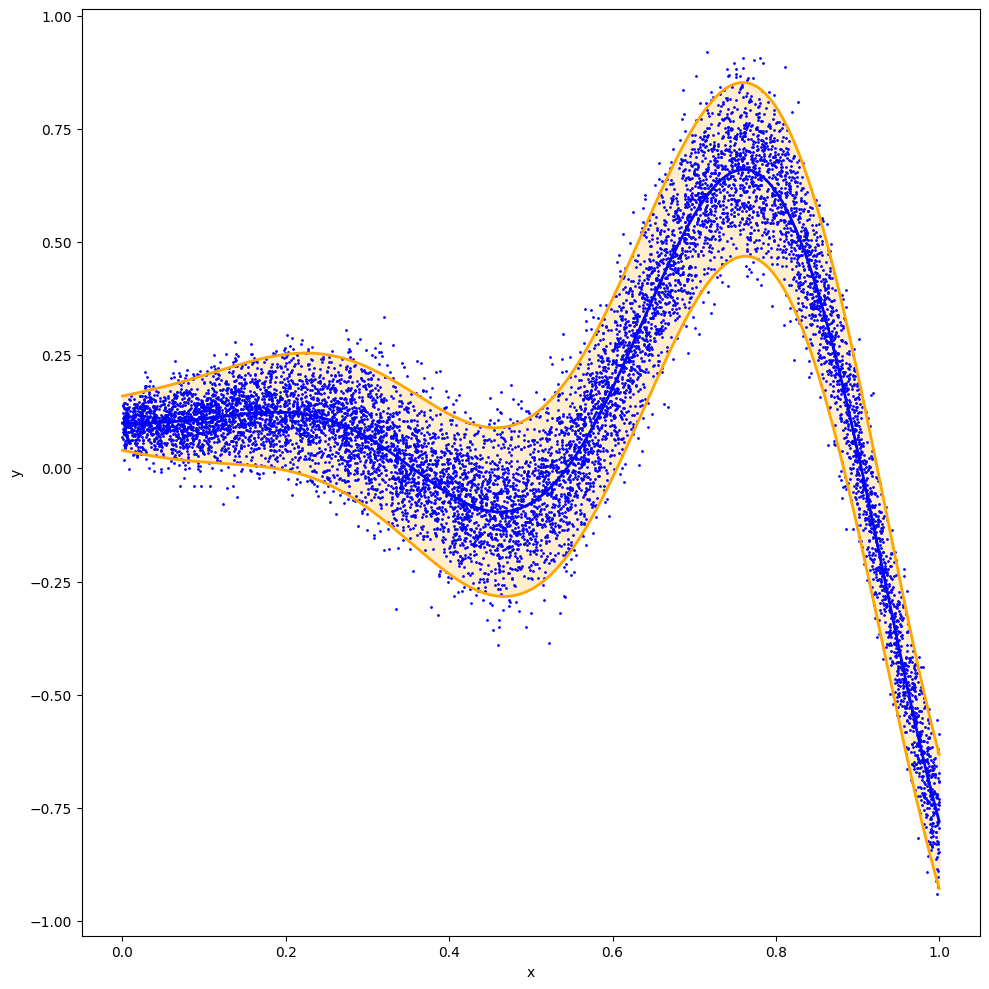

In [5]:
from universalbands.data_generation import Synthetic

case_number = 9
sample_size = 10000
sample_dim = 1
seed = 123


my_data = Synthetic(
    name=f"case_{case_number}",
    input_shape=(sample_size, sample_dim),
    output_shape=(sample_size, 1),
)

X, y = my_data.sample(seed=seed)

mean_oracle, lo_oracle, up_oracle = my_data.oracle(X=X, alpha=0.05)

#plot(X, y)
plot_oracle(X, y, mean_oracle, lo_oracle, up_oracle)

In [ ]:
import numpy as np

case_number = 2
sample_size = 10000
sample_dim = 1
seed = 123


def variance(x):
    #return np.ones(x.shape)
    return np.sqrt(1 + x + 4 * x**2)


def mean(x):
    return np.zeros(x.shape[0])


X = np.random.default_rng(seed=seed).uniform(
    low=-2, high=2, size=(sample_size, sample_dim)
)
epsilon = np.random.default_rng(seed=seed).normal(
    loc=0, scale=1, size=(sample_size, sample_dim)
)
beta = np.array([1, 1])
y = mean(X).reshape(-1, 1) + np.sum(variance(X) * beta * epsilon, axis=1).reshape(-1, 1)

plot(X, y)

In [ ]:
import numpy as np

sample_size = 10000
sample_dim = 2
seed = 123


def variance(x):
    # return np.ones(x.shape)
    # return np.sqrt(1 + x + 4 * x**2)
    return np.sqrt(0.1 + 2 * (x**2))


def mean(x):
    x = 10 * (1 + x)
    result = np.where(
        x <= 9.6,
        np.sin(np.pi * x / 5) + np.cos(4 * np.pi * x / 5) / 5,  # When x <= 9.6
        -1 + x / 10,  # When x > 9.6
    )
    return np.sum(result, axis=1).reshape(-1, 1)


X = np.random.default_rng(seed=seed).uniform(
    low=-1, high=1, size=(sample_size, sample_dim)
)
epsilon = np.random.default_rng(seed=seed).normal(
    loc=0, scale=1, size=(sample_size, sample_dim)
)
beta = np.array([1, 1])
y = mean(X).reshape(-1, 1) + np.sum(variance(X) * beta * epsilon, axis=1).reshape(-1, 1)

plot(X, y)